<a target="_blank" rel="noopener noreferrer" href="https://colab.research.google.com/github/ccaudek/ds4psy_2023/blob/main/225_likelihood.ipynb">![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)</a>


(notebook-likelihood)=
# La verosimiglianza 

La funzione di verosimiglianza rappresenta un elemento chiave che collega i dati osservati ai parametri di un modello statistico. È un concetto fondamentale che sottende gran parte dell'analisi statistica e svolge un ruolo centrale nell'applicazione del Teorema di Bayes. La sua definizione e comprensione sono essenziali per qualsiasi persona coinvolta nella ricerca scientifica, nell'analisi dei dati o nell'interpretazione dei risultati.

In questo capitolo, esploreremo a fondo il concetto di verosimiglianza. Scopriremo come essa rappresenta un ponte tra i dati che osserviamo e i parametri che desideriamo stimare o testare. Attraverso esempi concreti, illustreremo come la verosimiglianza può essere calcolata e utilizzata per formulare inferenze statistiche. Sarà chiaro come questa funzione gioca un ruolo cruciale in molti contesti, dall'analisi dei dati sperimentali alla costruzione di modelli complessi.

```{admonition} Obiettivi di apprendimento
Dopo aver completato questo capitolo, sarete in grado di:

- Comprendere il concetto di verosimiglianza e il suo ruolo nella dei parametri.
- Generare grafici della funzione di verosimiglianza binomiale.
- Generare grafici della funzione di verosimiglianza del modello gaussiano.
- Interpretare i grafici della funzione di verosimiglianza.
- Comprendere il concetto di stima di massima verosimiglianza.
```

## Preparazione del Notebook

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import math
import arviz as az
import seaborn as sns

In [2]:
%config InlineBackend.figure_format = 'retina'
RANDOM_SEED = 42
rng = np.random.default_rng(RANDOM_SEED)
az.style.use("arviz-darkgrid")
sns.set_theme(palette="colorblind")

## Concetto di Verosimiglianza e Sua Formalizzazione Matematica

La funzione di verosimiglianza è una struttura matematica utilizzata per quantificare la congruenza tra un insieme di dati osservati $ y $ e un modello statistico parametrizzato da $ \theta $. Essa è formalmente definita come proporzionale alla probabilità condizionale dei dati $ y $ dato il vettore dei parametri $ \theta $:

$$
\begin{equation}
L(\theta | y) \propto p(y | \theta).
\end{equation}
$$ (eq-likelihood-def)

In questa espressione, $ L(\theta | y) $ rappresenta la funzione di verosimiglianza, mentre $ p(y | \theta) $ è la densità (o funzione di massa nel caso discreto) di probabilità dei dati $ y $ condizionata dai parametri $ \theta $.

La costante di proporzionalità, spesso omessa, è irrilevante nel contesto dell'ottimizzazione della funzione di verosimiglianza. Ciò è dovuto al fatto che tale costante non dipende dai parametri $ \theta $ e, quindi, non influisce sull'identificazione del valore di $ \theta $ che massimizza la funzione.

Immaginiamo di avere una moneta e di voler valutare se è equilibrata. Dopo 10 lanci, osserviamo 7 facce. Utilizziamo la distribuzione binomiale per modellare questa situazione. La funzione di massa di probabilità (FMP) della distribuzione binomiale è data da:

$$
p(y | n, p) = \binom{n}{y} \cdot p^y \cdot (1 - p)^{(n - y)},
$$

dove $ n $ è il numero totale di tentativi, $ y $ è il numero di successi, e $ p $ è la probabilità di successo.

Se vogliamo calcolare la verosimiglianza di osservare 7 facce in 10 lanci con una moneta equilibrata ($ p = 0.5 $), la formula diventa:

$$
L(p = 0.5 | y = 7, n = 10) \propto \binom{10}{7} \cdot 0.5^7 \cdot (1 - 0.5)^{3}.
$$

Questo calcolo ci permette di quantificare quanto sia verosimile osservare 7 facce in 10 lanci, supponendo che la moneta sia equilibrata. Calcolando la verosimiglianza per diversi valori di $ p $, possiamo individuare il valore che massimizza questa funzione e, quindi, ottenere una stima più precisa della "vera" probabilità di ottenere una faccia con questa moneta.

È importante notare che la funzione di verosimiglianza e la funzione di probabilità o densità possono essere rappresentate dalla stessa formula matematica, ma la loro interpretazione e applicazione sono differenti. Mentre la funzione di probabilità si concentra sul calcolo della probabilità dei dati $ y $ dati i parametri $ \theta $, la funzione di verosimiglianza è utilizzata per determinare la plausibilità di differenti valori del parametro $ \theta $ alla luce dei dati osservati $ y $.

In sintesi, la funzione di verosimiglianza è uno strumento fondamentale nell'inferenza statistica. Essa fornisce un criterio per valutare e confrontare la plausibilità di diversi valori del parametro $ \theta $, e serve come base per metodi di stima puntuali o intervallari dei parametri del modello.

## Verosimiglianza nel Contesto del Modello Binomiale: Un Esempio Approfondito

Esploriamo ulteriormente l'importanza della funzione di verosimiglianza mediante un esempio concreto basato sulla distribuzione binomiale. Immaginiamo di effettuare un esperimento composto da $ n $ prove indipendenti, ciascuna con due possibili esiti: successo o fallimento (ad esempio, lanci di una moneta). Supponiamo di aver registrato $ y $ successi e $ n - y $ fallimenti. In questo contesto, la funzione di massa di probabilità (FMP) binomiale che governa la probabilità di osservare esattamente $ y $ successi è:

$$
P(Y = y) = \binom{n}{y} \theta^y (1 - \theta)^{n - y},
$$

dove $ \theta $ rappresenta la probabilità intrinseca di successo in ogni singola prova di Bernoulli.

La funzione di verosimiglianza, invece, è utilizzata per esprimere la plausibilità relativa di osservare i dati $ y $ al variare del parametro $ \theta $. Matematicamente, questa è formulata come:

$$
\mathcal{L}(\theta \mid y) = \binom{n}{y} \theta^y (1 - \theta)^{n - y}.
$$

Poiché il coefficiente binomiale $\binom{n}{y}$ è indipendente da $ \theta $, possiamo semplificare la funzione di verosimiglianza a:

$$
\mathcal{L}(\theta \mid y) = \theta^y (1 - \theta)^{n - y}.
$$

Per illustrare con un esempio applicativo, facciamo riferimento allo studio di {cite:t}`zetsche_2019future`. In questo studio, su un campione di 30 pazienti affetti da depressione clinica, 23 mostravano aspettative negativamente distorte riguardo al loro futuro stato d'animo. Pertanto, nel contesto di questi dati, la funzione di verosimiglianza è definita dalla distribuzione binomiale con un parametro $ \theta $ ignoto nell'intervallo [0, 1]. Avendo osservato $ y = 23 $ successi in $ n = 30 $ prove, la funzione di verosimiglianza assume la forma:

$$
\begin{equation}
\mathcal{L}(\theta \mid y) = \frac{(23 + 7)!}{23!7!} \theta^{23} (1 - \theta)^7.
\end{equation}
$$ (eq-likebino23)

Per costruire il profilo di verosimiglianza, è necessario valutare l'Equazione $(\text{eq-likebino23})$ per un insieme di possibili valori di $ \theta $ nell'intervallo [0, 1]. Per esempio, potremmo considerare 100 valori di $ \theta $ equidistanti in questo intervallo. I dati $ y $ e $ n $ rimangono fissi durante questo processo. In questo modo, otteniamo una panoramica della plausibilità relativa dei vari valori di $ \theta $, permettendoci di identificare il valore che massimizza la funzione di verosimiglianza e, quindi, di effettuare una stima puntuale del parametro $ \theta $ più congruente con i dati osservati.

Nella simulazione seguente, considereremo 100 valori possibili per $\theta$ nell'intervallo [0, 1]. Iniziamo a definire i dati.

In [3]:
n = 30
y = 23

Creiamo ora i possibili valori del parametro $\theta$ per i quali calcoleremo la verosimiglianza.

In [4]:
theta = np.linspace(0.0, 1.0, num=100)
print(theta)

[0.         0.01010101 0.02020202 0.03030303 0.04040404 0.05050505
 0.06060606 0.07070707 0.08080808 0.09090909 0.1010101  0.11111111
 0.12121212 0.13131313 0.14141414 0.15151515 0.16161616 0.17171717
 0.18181818 0.19191919 0.2020202  0.21212121 0.22222222 0.23232323
 0.24242424 0.25252525 0.26262626 0.27272727 0.28282828 0.29292929
 0.3030303  0.31313131 0.32323232 0.33333333 0.34343434 0.35353535
 0.36363636 0.37373737 0.38383838 0.39393939 0.4040404  0.41414141
 0.42424242 0.43434343 0.44444444 0.45454545 0.46464646 0.47474747
 0.48484848 0.49494949 0.50505051 0.51515152 0.52525253 0.53535354
 0.54545455 0.55555556 0.56565657 0.57575758 0.58585859 0.5959596
 0.60606061 0.61616162 0.62626263 0.63636364 0.64646465 0.65656566
 0.66666667 0.67676768 0.68686869 0.6969697  0.70707071 0.71717172
 0.72727273 0.73737374 0.74747475 0.75757576 0.76767677 0.77777778
 0.78787879 0.7979798  0.80808081 0.81818182 0.82828283 0.83838384
 0.84848485 0.85858586 0.86868687 0.87878788 0.88888889 0.89898

Per esempio, ponendo $\theta = 0.1$ otteniamo il seguente valore dell'ordinata della funzione di verosimiglianza:

$$
\mathcal{L}(\theta \mid y) = \frac{(23 + 7)!}{23!7!} 0.1^{23} + (1-0.1)^7.
$$

In [5]:
stats.binom.pmf(y, n, 0.1)

9.7371682902e-18

Ponendo $\theta = 0.2$ otteniamo il seguente valore dell'ordinata della funzione di verosimiglianza:

$$
\mathcal{L}(\theta \mid y) = \frac{(23 + 7)!}{23!7!} 0.2^{23} + (1-0.2)^7.
$$

In [6]:
stats.binom.pmf(y, n, 0.2)

3.58141723492221e-11

Se ripetiamo questo processo 100 volte, una volta per ciascuno dei valori $\theta$ che abbiamo elencato sopra, otteniamo 100 coppie di punti $\theta$ e $f(\theta)$. A tale fine, definiamo la seguente funzione.

In [7]:
def like(r, n, theta):
    return math.comb(n, r) * theta**r * (1 - theta) ** (n - r)

La curva che interpola i punti ottenuti è la funzione di verosimiglianza, come indicato dalla figura seguente.

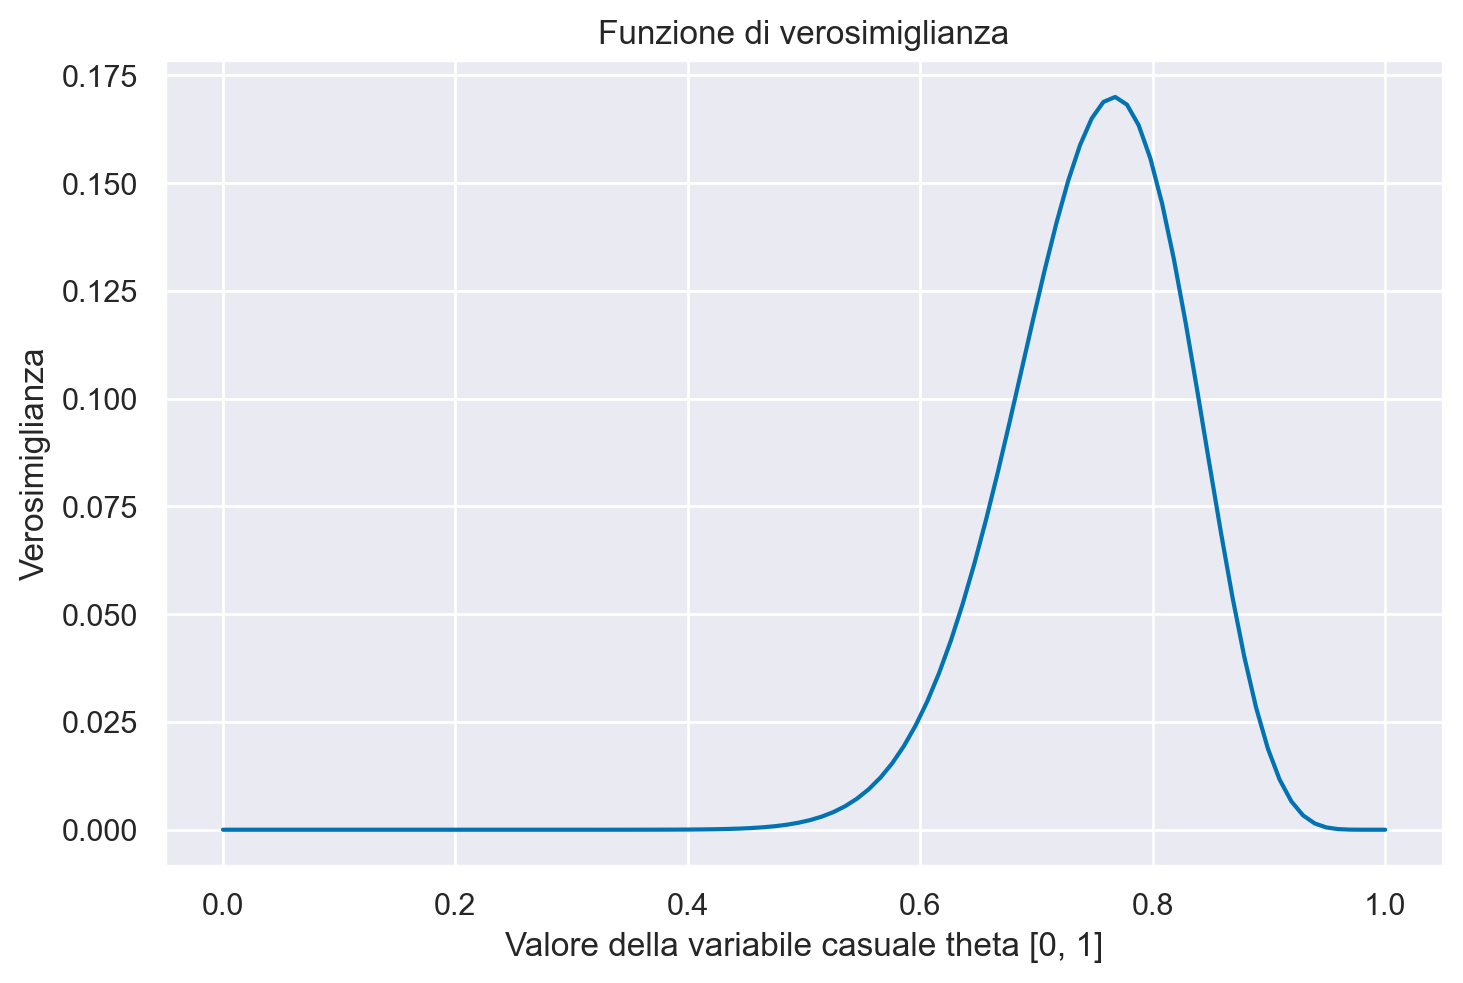

In [8]:
plt.figure()
plt.plot(theta, like(r=y, n=n, theta=theta), "-")
plt.title("Funzione di verosimiglianza")
plt.xlabel("Valore della variabile casuale theta [0, 1]")
plt.ylabel("Verosimiglianza");

### Interpretazione della Funzione di Verosimiglianza

La funzione di verosimiglianza, denotata come $ L(\theta) $ o alternativamente $ p(Y \mid \theta) $, è una funzione che varia in base al parametro $ \theta $. Ogni valore specifico di $ \theta $ determina un valore corrispondente della funzione di verosimiglianza, permettendoci di valutare quanto quel particolare $ \theta $ sia coerente o plausibile alla luce dei dati osservati. In altre parole, la funzione di verosimiglianza agisce come un termometro che misura l'adeguatezza dei diversi valori del parametro $ \theta $ rispetto al campione di dati disponibile.

Il valore di $ \theta $ che massimizza questa funzione è particolarmente significativo, poiché rappresenta la stima più plausibile del parametro dato il set di dati osservato. Ad esempio, nel nostro caso pratico, il valore di $ \theta $ che emerge come più plausibile è $ \frac{23}{30} = 0.767 $, il quale corrisponde al massimo (o modalità) della funzione di verosimiglianza.

Per identificare numericamente questo valore ottimale di $ \theta $, si può localizzare l'indice nel vettore dei valori di verosimiglianza dove questa raggiunge il suo picco. Metodi computazionali, come l'uso della funzione `argmax` in NumPy, possono automatizzare questo processo. Una volta individuato l'indice che massimizza la verosimiglianza, si può risalire al valore corrispondente di $ \theta $ nel vettore dei parametri, ottenendo così la stima di $ \theta $ che rende i dati osservati più probabili.

In [9]:
l = like(r=y, n=n, theta=theta)
l.argmax()

76

In [10]:
theta[76]

0.7676767676767677

È importante notare che, invece di utilizzare la funzione `like()` che abbiamo definito precedentemente per motivi didattici, è possibile ottenere lo stesso risultato utilizzando in modo equivalente la funzione `binom.pmf()`. 

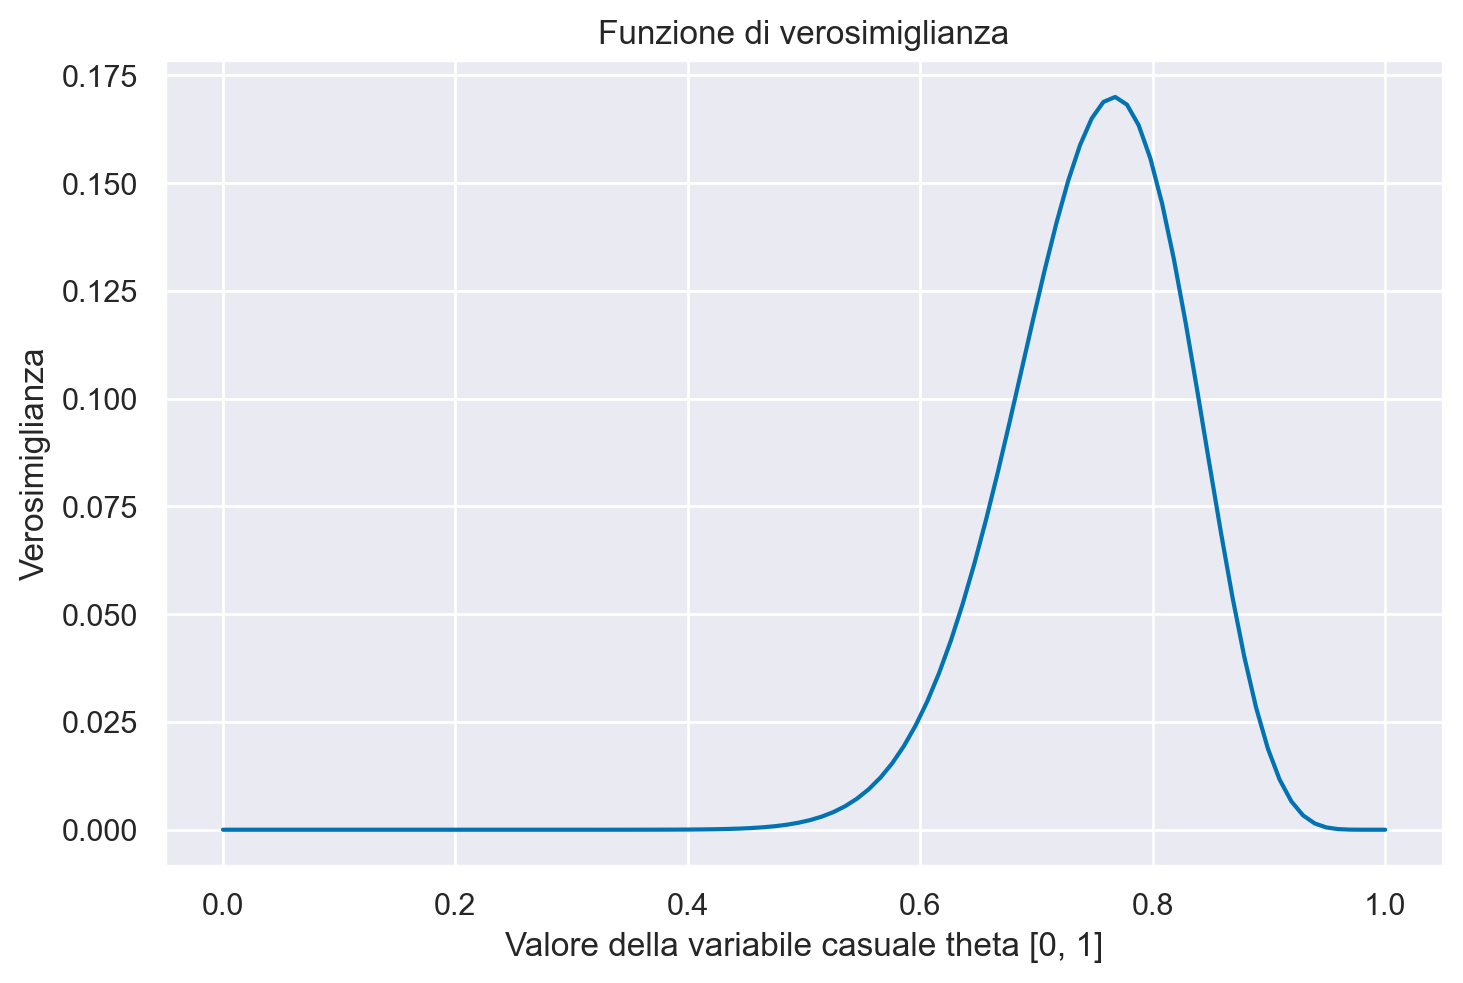

In [11]:
plt.figure()
plt.plot(theta, stats.binom.pmf(y, n, theta), "-")
plt.title("Funzione di verosimiglianza")
plt.xlabel("Valore della variabile casuale theta [0, 1]")
plt.ylabel("Verosimiglianza");

### La Funzione di Log-Verosimiglianza

Nelle applicazioni pratiche, si preferisce frequentemente lavorare con il logaritmo naturale della funzione di verosimiglianza, noto come funzione di log-verosimiglianza. Questa è definita come:

$$
\begin{equation}
\ell(\theta) = \log \mathcal{L}(\theta).
\end{equation}
$$ (eq-loglike-definition)

Grazie alla monotonicità del logaritmo (specificamente, essendo una funzione strettamente crescente), i punti di massimo per $ \mathcal{L}(\theta) $ e $ \ell(\theta) $ coincidono, ovvero:

$$
\hat{\theta} = \arg \max_{\theta \in \Theta} \ell(\theta) = \arg \max_{\theta \in \Theta} \mathcal{L}(\theta).
$$

La funzione di log-verosimiglianza per una distribuzione binomiale si articola come segue:

$$
\begin{aligned}
\ell(\theta \mid y) &= \log \mathcal{L}(\theta \mid y) \\
&= \log \left( \theta^y (1-\theta)^{n-y} \right) \\
&= y \log \theta + (n-y) \log (1-\theta).
\end{aligned}
$$

Utilizzare la log-verosimiglianza piuttosto che la verosimiglianza diretta è consigliato per diverse ragioni pratiche. Una delle principali è legata alla stabilità numerica: i valori della funzione di verosimiglianza possono diventare molto piccoli—al punto da raggiungere l'ordine di $ 10^{-34} $ o inferiori—portando a potenziali problemi di arrotondamento e precisione numerica durante i calcoli. La trasformazione logaritmica mitiga questo problema trasformando i prodotti in somme e rendendo i valori più maneggevoli dal punto di vista numerico.

Per illustrare questo concetto, possiamo riprendere l'esempio precedente e applicare la funzione di log-verosimiglianza per identificare il valore di $ \theta $ che massimizza questa funzione. In pratica, potremmo utilizzare metodi computazionali come la funzione `binom.logpmf()` per eseguire questa operazione.

La rappresentazione grafica della funzione di log-verosimiglianza fornisce ulteriori intuizioni sul comportamento di questa funzione.

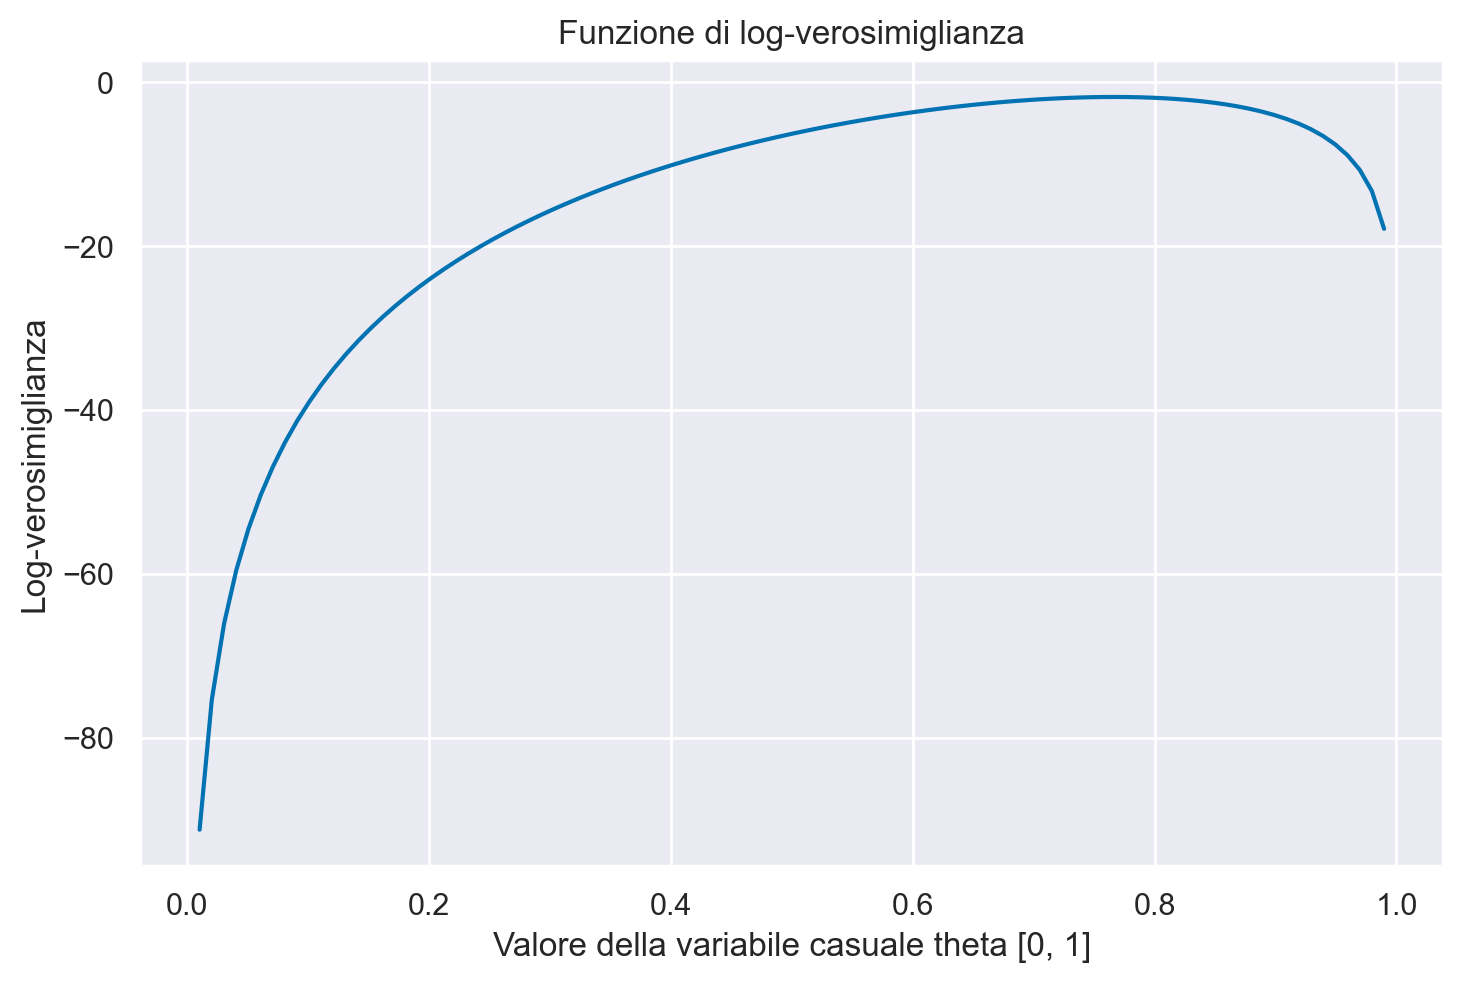

In [12]:
n = 30
r = 23
plt.figure()
plt.plot(theta, stats.binom.logpmf(y, n, theta), "-")
plt.title("Funzione di log-verosimiglianza")
plt.xlabel("Valore della variabile casuale theta [0, 1]")
plt.ylabel("Log-verosimiglianza");

Il risultato replica quello trovato in precedenza con la funzione di verosimiglianza.


In [13]:
ll = stats.binom.logpmf(y, n, theta)
ll.argmax()

76

In [14]:
theta[76]

0.7676767676767677

### Verosimiglianza Congiunta di $ n $ Campioni IID da una Distribuzione Binomiale

Nella discussione precedente, abbiamo esaminato la verosimiglianza associata a una singola osservazione proveniente da una distribuzione binomiale. Ora estendiamo questo concetto a un contesto più generale, considerando $ n $ osservazioni indipendenti e identicamente distribuite (IID) da una distribuzione binomiale. 

Denotiamo con $ Y = [y_1, y_2, \ldots, y_n] $ il vettore che contiene queste $ n $ osservazioni. In questo caso, la probabilità congiunta delle osservazioni $ y_1, y_2, \ldots, y_n $ dato il parametro $ \theta $ si scrive come $ p(y_1, y_2, \ldots, y_n \mid \theta) $.

Grazie all'indipendenza delle osservazioni, la funzione di probabilità congiunta può essere fattorizzata nel prodotto delle funzioni di probabilità marginali, come segue:

$$
\begin{aligned}
p(y_1, y_2, \ldots, y_n \mid \theta) &= p(y_1 \mid \theta) \times p(y_2 \mid \theta) \times \cdots \times p(y_n \mid \theta) \\
&= \text{Binomiale}(y_1 \mid \theta) \times \text{Binomiale}(y_2 \mid \theta) \times \cdots \times \text{Binomiale}(y_n \mid \theta).
\end{aligned}
$$

In termini di verosimiglianza, quando inseriamo i valori osservati $ Y[1], Y[2], \ldots, Y[n] $ nella funzione di probabilità congiunta, otteniamo la funzione di verosimiglianza congiunta per le $ n $ osservazioni IID:

$$
\mathcal{L}(\theta \mid Y) = p(Y[1], Y[2], \ldots, Y[n] \mid \theta) = \prod_{i=1}^{n} p(Y[i] \mid \theta).
$$

Questa funzione di verosimiglianza congiunta fornisce una misura complessiva di quanto bene il modello binomiale con un dato $ \theta $ spiega l'insieme completo delle $ n $ osservazioni. Essa gioca un ruolo cruciale nell'inferenza statistica, specialmente quando si tratta di stimare il parametro $ \theta $ che massimizza la verosimiglianza congiunta a partire dai dati osservati.

### Modello Gaussiano e Verosimiglianza

Ampliamo ora la nostra analisi al caso della distribuzione gaussiana. Inizieremo con la verosimiglianza associata a una singola osservazione $ Y $, per poi estendere la discussione a un insieme di osservazioni gaussiane indipendenti e identicamente distribuite (IID).

Per una distribuzione gaussiana con media $ \mu $ e varianza $ \sigma^2 $, la funzione di verosimiglianza $ L $ si può esprimere come:

$$
\begin{aligned}
L(\theta \mid Y) &= \prod_{i=1}^{n} f(y_i \mid \mu, \sigma^2) \\
&= (2\pi\sigma^2)^{-\frac{n}{2}} \exp \left( -\frac{1}{2\sigma^2} \sum_{i=1}^{n} (y_i - \mu)^2 \right).
\end{aligned}
$$ (eq-gaussian-likelihood)

### Caso di una Singola Osservazione

Per una migliore comprensione dell'equazione di verosimiglianza (eq-gaussian-likelihood), consideriamo prima il caso in cui abbiamo una singola osservazione $ y $.

Immaginiamo che la variabile casuale $ y $ rappresenti il Quoziente d'Intelligenza (QI) di un individuo. In questa circostanza, la funzione di verosimiglianza per una singola osservazione dalla distribuzione gaussiana è:

$$
L(\mu, \sigma^2 \mid y) = \frac{1}{\sqrt{2\pi\sigma^2}} \exp \left( -\frac{1}{2\sigma^2} (y - \mu)^2 \right).
$$

Questa funzione di verosimiglianza quantifica quanto è probabile osservare un determinato valore di QI $ y $ data una distribuzione gaussiana con parametri $ \mu $ e $ \sigma^2 $. In altre parole, fornisce una misura di quanto i parametri $ \mu $ e $ \sigma^2 $ siano coerenti con l'osservazione $ y $ effettuata.

Poniamo

In [16]:
y = 114

L'eq. {eq}`eq-gaussian-sim-like` dipende dai parametri $\mu$ e $\sigma$ e dai dati $y$. Per semplicità, ipotizziamo $\sigma$ noto e uguale a 15. Nell'esercizio considereremo 1000 valori $\mu$ compresi tra 70 e 160.

In [17]:
mu = np.linspace(70.0, 160.0, num=1000)

Nell'analisi che stiamo conducendo, esaminiamo 1000 diversi valori per il parametro $ \mu $. Per costruire la funzione di verosimiglianza, applichiamo l'equazione (eq-gaussian-likelihood) per ciascuno di questi valori. In questo modo, otteniamo una valutazione della plausibilità relativa di ciascun valore di $ \mu $ alla luce dei dati osservati.

Per essere precisi, in ogni iterazione del calcolo applichiamo l'equazione (eq-gaussian-likelihood) utilizzando:

- Il valore osservato $ y $, che è costante per tutte le iterazioni.
- Un valore noto e costante per $ \sigma $.
- Un valore specifico per $ \mu $ tratto dall'insieme dei 1000 valori che stiamo esaminando.

Pertanto, tra le variabili nell'equazione, $ \mu $ è l'unica che cambia in ciascuna delle 1000 iterazioni, mentre $ y $ e $ \sigma $ rimangono invariati.

In Python, la densità di probabilità della distribuzione gaussiana può essere calcolata utilizzando la funzione `norm.pdf()` dalla libreria `scipy.stats`. Questa funzione accetta come argomenti:

- Il valore osservato $ y $ o un array di tali valori.
- La media $ \mu $ o un array di medie, nel caso si voglia valutare più di una distribuzione gaussiana.
- La deviazione standard $ \sigma $ o un array di deviazioni standard, analogamente al caso delle medie.

In pratica, utilizzando la funzione `norm.pdf()` con un valore fisso di $ y $ (ad esempio, $ y = 114 $) e $ \sigma $ (ad esempio, $ \sigma = 15 $), e variando $ \mu $ attraverso i 1000 valori predefiniti, otteniamo un array di 1000 valori di densità di probabilità. Questi rappresentano la verosimiglianza di ciascun valore specifico di $ \mu $ dato l'osservato $ y $.

Applicando la funzione `norm.pdf()` 1000 volte, una volta per ciascuno dei valori $\mu$ che abbiamo definito (e tenendo fissi $y = 114$ e $\sigma = 15$), otteniamo 1000 valori $f(\mu)$.

In [18]:
f_mu = stats.norm.pdf(y, loc=mu, scale=15)

La funzione di verosimiglianza è la curva che interpola i punti $\big(\mu, f(\mu)\big)$.

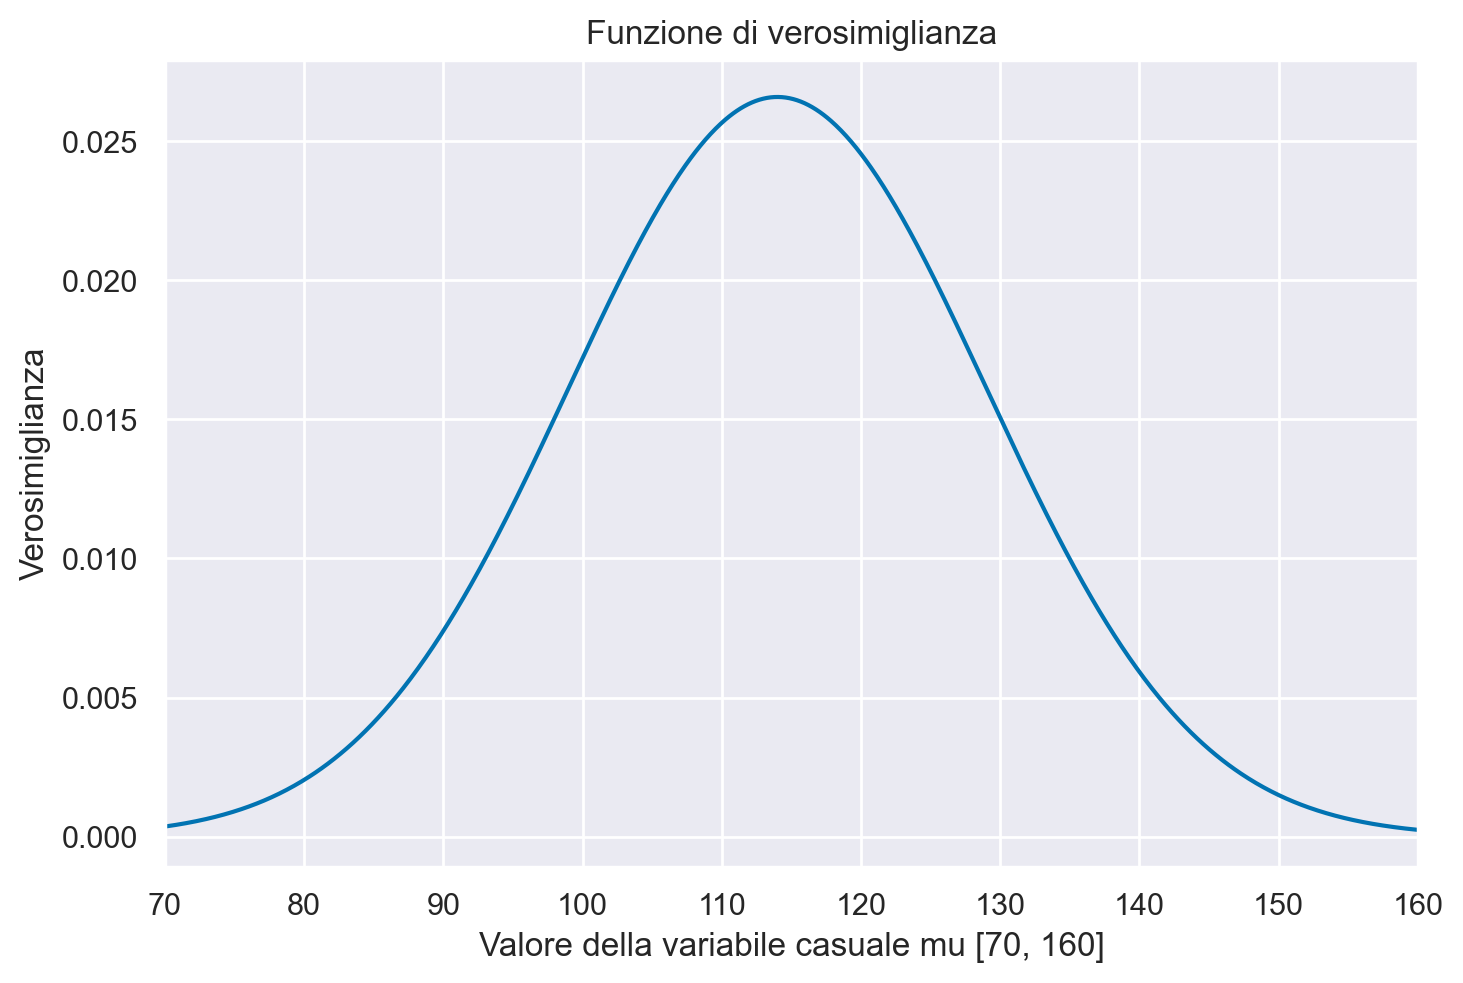

In [19]:
plt.figure()
plt.plot(mu, f_mu, "-")
plt.title("Funzione di verosimiglianza")
plt.xlabel("Valore della variabile casuale mu [70, 160]")
plt.ylabel("Verosimiglianza")
plt.xlim([70, 160]);

La funzione di verosimiglianza così trovata ha la forma della distribuzione Gaussiana. Nel caso di una singola osservazione, *ma solo in questo caso*, ha anche un'area unitaria. Per l'esempio presente, la moda della funzione di verosimiglianza è 114.

In [20]:
l = stats.norm.pdf(y, loc=mu, scale=15)
mu[l.argmax()]

113.96396396396396

### Campione indipendente di osservazioni da una distribuzione gaussiana

Esaminiamo il caso più complesso di un campione di $ n $ osservazioni indipendenti estratte da una distribuzione gaussiana. Questo campione può essere concepito come una serie di $ n $ realizzazioni indipendenti e identicamente distribuite (i.i.d.) di una variabile casuale $ Y $ che segue una distribuzione normale $ \mathcal{N}(\mu, \sigma^2) $. Gli elementi del campione sono quindi estratti da una popolazione che segue una distribuzione normale con parametri $ \mu $ e $ \sigma $, entrambi sconosciuti, e che possiamo denotare con $ \theta = \{\mu, \sigma\} $.

Nel caso in cui le osservazioni $ y_1, y_2, \ldots, y_n $ siano i.i.d., la densità di probabilità congiunta del campione è espressa come:

$$
f(y \mid \theta) = \prod_{i=1}^{n} f(y_i \mid \theta),
$$

dove $ f(\cdot) $ rappresenta la funzione di densità di probabilità gaussiana parametrizzata da $ \mu $ e $ \sigma $.

Mantenendo i dati osservati $ y $ costanti, la funzione di verosimiglianza per il campione diventa equivalente all'equazione (eq-gaussian-sim-like).

Per illustrare questo concetto concretamente, prendiamo in esame un esempio che utilizza i punteggi BDI-II (Beck Depression Inventory II) di trenta partecipanti in uno studio clinico, come descritto in {cite:t}`zetsche_2019future`.

In [21]:
y = [
    26,
    35,
    30,
    25,
    44,
    30,
    33,
    43,
    22,
    43,
    24,
    19,
    39,
    31,
    25,
    28,
    35,
    30,
    26,
    31,
    41,
    36,
    26,
    35,
    33,
    28,
    27,
    34,
    27,
    22,
]

Il nostro obiettivo è di costruire una funzione di verosimiglianza per i punteggi BDI-II di un campione di 30 partecipanti. Supponiamo, sulla base di ricerche precedenti, che questi punteggi siano distribuiti secondo una legge normale. Inoltre, assumiamo che la deviazione standard $ \sigma $ sia nota e pari alla deviazione standard del campione, che è 6.50.

Per la prima osservazione del campione, $ y_1 = 26 $, la funzione di densità di probabilità è data da:

$$
f(26 \mid \mu_0, \sigma = 6.50) = \frac{1}{6.50 \sqrt{2\pi}} \exp \left\{ -\frac{(26 - \mu_0)^2}{2 \times 6.50^2} \right\}.
$$

Per il campione completo, la densità di probabilità congiunta è il prodotto delle densità di tutte le singole osservazioni:

$$
f(y \mid \mu, \sigma = 6.50) = \prod_{i=1}^{n} f(y_i \mid \mu, \sigma = 6.50).
$$

Quindi, la funzione di verosimiglianza, denotata come $ \mathcal{L}(\mu_0, \sigma = 6.50 \mid y) $, è determinata dal prodotto delle densità di probabilità di tutte le osservazioni nel campione:

$$
\begin{aligned}
\mathcal{L}(\mu_0, \sigma=6.50 \mid y) &= \prod_{i=1}^{30} \frac{1}{6.50 \sqrt{2\pi}} \exp \left\{ -\frac{(y_i - \mu_0)^2}{2 \times 6.50^2} \right\} \\
&= \frac{1}{6.50 \sqrt {2\pi}} \exp\left\{ -\frac{(26 - \mu_0)^2}{2 \times 6.50^2} \right\} \\
&\quad \times \frac{1}{6.50 \sqrt {2\pi}} \exp\left\{ -\frac{(35 - \mu_0)^2}{2 \times 6.50^2} \right\} \\
&\quad \times \vdots \\
&\quad \times \frac{1}{6.50 \sqrt {2\pi}} \exp\left\{ -\frac{(22 - \mu_0)^2}{2 \times 6.50^2} \right\}.
\end{aligned}
$$

In questo contesto, $ \mu_0 $ è uno dei molti possibili valori del parametro $ \mu $. Se consideriamo, ad esempio, 1000 diversi valori possibili per $ \mu $, dovremmo calcolare la funzione di verosimiglianza 1000 volte, una per ciascun valore di $ \mu $.

Per rendere i calcoli più gestibili, è consigliabile utilizzare il logaritmo della funzione di verosimiglianza. In Python, possiamo definire una funzione `log_likelihood()` che accetta come argomenti `y`, `mu` e `sigma = true_sigma`. Per semplificare, impostiamo `true_sigma` uguale alla deviazione standard osservata nel campione.

In [22]:
true_sigma = np.std(y)
print(true_sigma)

6.495810615739622


In [23]:
def log_likelihood(y, mu, sigma=true_sigma):
    return np.sum(stats.norm.logpdf(y, loc=mu, scale=true_sigma))

Consideriamo, ad esempio, il valore $\mu_0 = \bar{y}$, ovvero


In [24]:
bar_y = np.mean(y)
print(bar_y)

30.933333333333334


L'ordinata della funzione di log-verosimiglianza in corrispondenza di $\mu = 30.93$ è


In [25]:
log_likelihood(y, 30.93, sigma=true_sigma)

-98.70288339960591

Troviamo ora i valori della log-verosimiglianza per ciascuno dei 1000 valori $\mu$ nell'intervallo $[\bar{y} - 2 \sigma, \bar{y} + 2 \sigma]$. Iniziamo a definire il vettore `mu`.


In [26]:
mu = np.linspace(np.mean(y) - 2 * np.std(y), np.mean(y) + 2 * np.std(y), num=1000)

Troviamo il valore dell'ordinata della funzione di log-verosimiglianza in corrispondenza di ciascuno dei 1000 valori `mu` che abbiamo definito.

In [27]:
ll = [log_likelihood(y, mu_val, true_sigma) for mu_val in mu]

Nel caso di un solo parametro sconosciuto (nel caso presente, $\mu$) è possibile rappresentare la log-verosimiglianza con una curva che interpola i punti (`mu`, `ll`). Tale funzione descrive la *credibilità relativa* che può essere attribuita ai valori del parametro $\mu$ alla luce dei dati osservati.

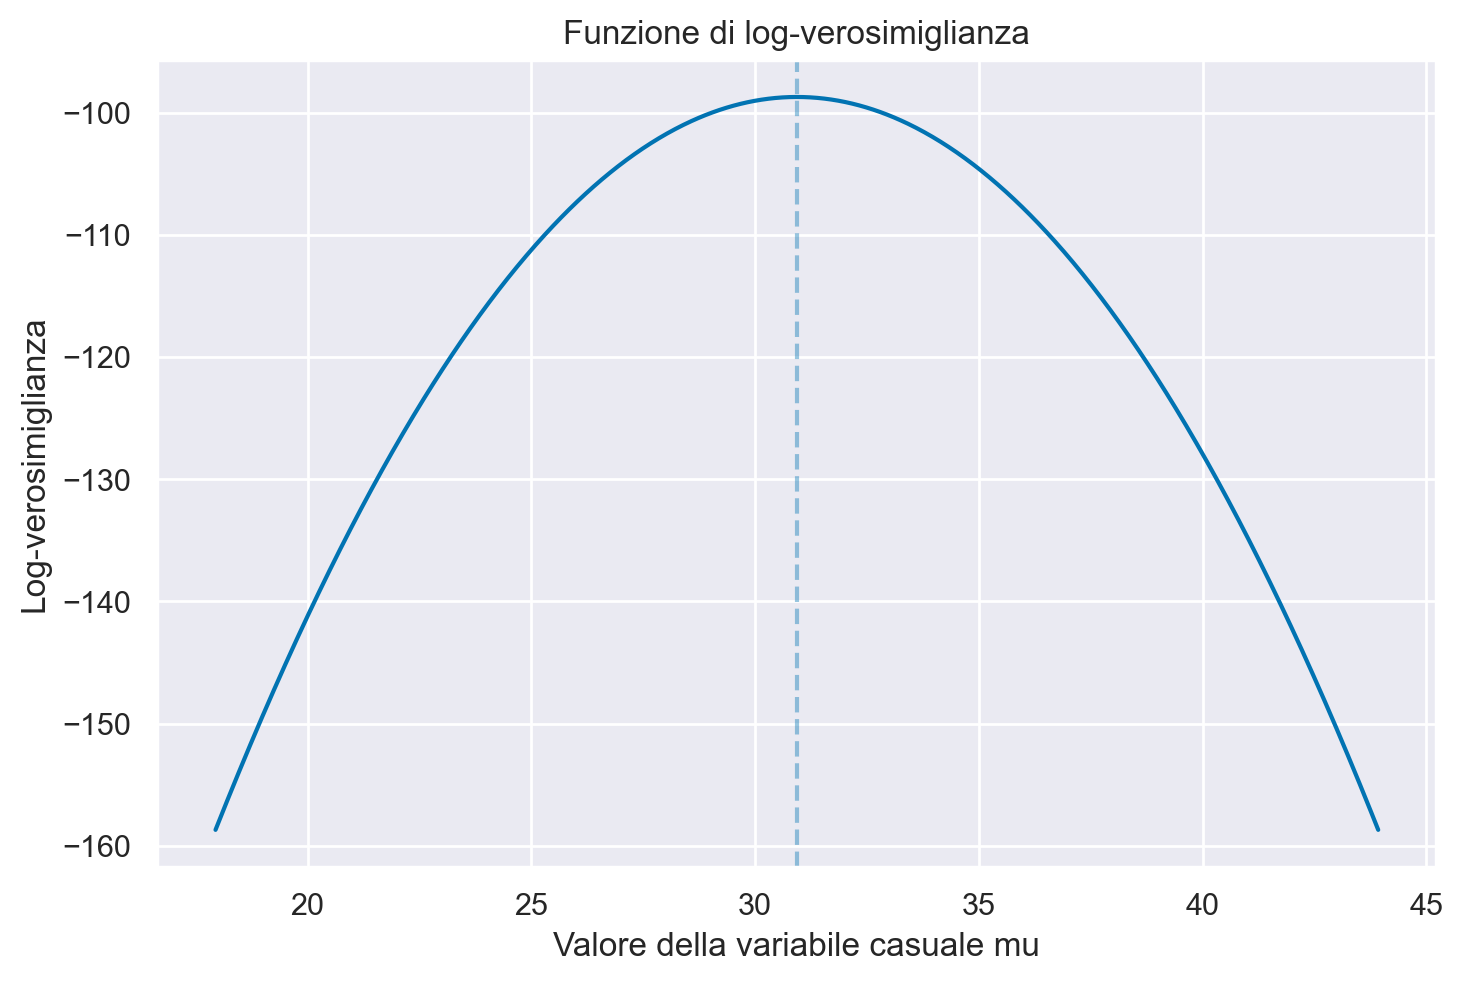

In [28]:
plt.figure()
plt.plot(mu, ll, "-")
plt.title("Funzione di log-verosimiglianza")
plt.xlabel("Valore della variabile casuale mu")
plt.ylabel("Log-verosimiglianza")
plt.axvline(x=np.mean(y), alpha=0.4, ls="--");

Il valore $\mu$ più credibile corrisponde al massimo della funzione di log-verosimiglinza e viene detto *stima di massima verosimiglianza*.

Il massimo della funzione di log-verosimiglianza, ovvero 30.93 per l'esempio in discussione, è identico alla media dei dati campionari. 

## Derivazione Formale della Stima di Massima Verosimiglianza per una Distribuzione Gaussiana

Per ottenere le stime di massima verosimiglianza (MLE) dei parametri $ \mu $ e $ \sigma^2 $ in una distribuzione gaussiana, ricorriamo all'analisi matematica, in particolare al calcolo delle derivate. La funzione di log-verosimiglianza $ \ell(\theta) $ per una distribuzione gaussiana è data da:

$$
\begin{aligned}
\ell(\mu, \sigma^2 \mid Y) &= \log \left( (2\pi\sigma^2)^{-n/2} \exp \left( -\frac{1}{2\sigma^2} \sum_{i=1}^n (y_i - \mu)^2 \right) \right) \\
&= -\frac{n}{2} \log(2\pi) - \frac{n}{2} \log(\sigma^2) - \frac{1}{2\sigma^2} \sum_{i=1}^n (y_i - \mu)^2.
\end{aligned}
$$

L'obiettivo è massimizzare $ \ell(\mu, \sigma^2 \mid Y) $ rispetto a $ \mu $ e $ \sigma^2 $, ovvero:

$$
\max_{\mu, \sigma^2} \ell(\mu, \sigma^2 \mid Y).
$$

### Stima di Massima Verosimiglianza per $ \mu $

Per trovare la stima di $ \mu $ che massimizza la funzione di log-verosimiglianza, calcoliamo la derivata parziale di $ \ell $ rispetto a $ \mu $ e la poniamo uguale a zero:

$$
\begin{aligned}
\frac{\partial \ell}{\partial \mu} &= \frac{\partial}{\partial \mu} \left( -\frac{n}{2} \log(2\pi) - \frac{n}{2} \log(\sigma^2) - \frac{1}{2\sigma^2} \sum_{i=1}^n (y_i - \mu)^2 \right) \\
&= \sum_{i=1}^n \frac{(y_i - \mu)}{\sigma^2} \\
&= \frac{1}{\sigma^2} \sum_{i=1}^n (y_i - \mu) = 0.
\end{aligned}
$$

Risolvendo questa equazione, otteniamo:

$$
\begin{aligned}
\hat{\mu}_{MLE} &= \frac{1}{n} \sum_{i=1}^n y_i \\
&= \bar{y}.
\end{aligned}
$$

La stima di massima verosimiglianza per $ \mu $ corrisponde quindi alla media aritmetica delle osservazioni.

### Stima di Massima Verosimiglianza per $ \sigma^2 $

Una derivazione simile può essere effettuata per $ \sigma^2 $, e si può dimostrare che la stima di massima verosimiglianza per $ \sigma^2 $ è la varianza campionaria.

In sintesi, le stime di massima verosimiglianza per $ \mu $ e $ \sigma^2 $ in una distribuzione gaussiana coincidono con la media e la varianza campionaria, rispettivamente.

## Conclusione e Riflessioni Finali

La funzione di verosimiglianza rappresenta un elemento cruciale che collega i dati osservati ai parametri di un modello statistico. Essa fornisce una misura della plausibilità dei dati in relazione a diversi valori possibili dei parametri del modello. La strutturazione di una funzione di verosimiglianza richiede la considerazione di tre componenti fondamentali: il modello statistico che si presume abbia generato i dati, l'insieme di valori possibili per i parametri di tale modello e le osservazioni empiriche che effettivamente abbiamo a disposizione.

La funzione di verosimiglianza è centrale nella pratica dell'inferenza statistica. Essa ci permette di quantificare quanto bene differenti set di parametri potrebbero aver generato i dati osservati. Questo è fondamentale sia per la selezione del modello che per la stima dei parametri, e pertanto è indispensabile per un'analisi dati rigorosa e per un'interpretazione accurata dei risultati.

Un'applicazione pratica e illustrativa dei principi esposti in questo capitolo è fornita nel capitolo {ref}`notebook-rescorla-wagner`, che è un esempio di come la teoria della verosimiglianza possa essere applicata per affrontare questioni empiriche complesse in psicologia.

In sintesi, la comprensione e l'applicazione appropriata della funzione di verosimiglianza sono passaggi essenziali nel processo di analisi dati. Essa costituisce uno strumento indispensabile per chi è impegnato nella ricerca empirica e nell'interpretazione di dati complessi.

```{admonition} Esercizi
All'esame ti verrà chiesto di:

- Calcolare la funzione di verosimiglianza binomiale e riportare il valore della funzione in corrispondenza di specifici valori $\theta$.
- Calcolare la funzione di verosimiglianza del modello gaussiano, per $\sigma$ noto, e riportare il valore della funzione in corrispondenza di specifici valori $\mu$.
- Calcolare la stima di massima verosimiglianza.
- Rispondere a domande che implicano una adeguata comprensione del concetto di funzione di verosimiglianza.
```

## Ambiente di Calcolo

In [29]:
%load_ext watermark
%watermark -n -u -v -iv -w

Last updated: Mon Jan 22 2024

Python implementation: CPython
Python version       : 3.11.7
IPython version      : 8.19.0

arviz     : 0.17.0
matplotlib: 3.8.2
pandas    : 2.1.4
seaborn   : 0.13.0
scipy     : 1.11.4
numpy     : 1.26.2

Watermark: 2.4.3

